# Run 2.1i BF Tests


In [123]:
%matplotlib inline

import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import lsst.daf.persistence as dafPersist
import lsst.afw.image as afwImage

import treecorr
from scipy.stats import binned_statistic



## Load Data 

In [128]:
!ls /global/cscratch1/sd/jchiang8/desc/BF_studies/Run2.1i/repo/rerun/C04_kernels

calexp	icSrc	    processCcd_metadata  schema  srcMatch
config	postISRCCD  repositoryCfg.yaml	 src


In [124]:
visits = [734193]
detectors = range(189)

In [125]:
!ls 

'2.1i BF Kernels.ipynb'			      'Tests of BF Kernels.ipynb'
'2.1i BF Tests.ipynb'			      diff_mags_v734193_bf_corr.pkl
C04_kernels_diff_mags_v734193_bf_corr.pkl     diff_mags_v734193_no_bf_corr.pkl
C04_kernels_diff_mags_v734193_no_bf_corr.pkl  sims_ci_pipe_setup.sh
C04_kernels_v734193_no_B-F_correction.png     v734193_B-F_correction.png
'ImSim Tests.ipynb'			      v734193_no_B-F_correction.png
Run2.1i_BF_results.ipynb


In [129]:
diff_mag_file_no_bf_corr = 'diff_mags_v{}_no_bf_corr.pkl'.format(visits[0])
diff_mag_file_bf_corr = 'diff_mags_v{}_bf_corr.pkl'.format(visits[0]) #'C04_kernels_diff_mags_v734193_bf_corr.pkl'

In [130]:
df_uncorrected = pd.read_pickle(diff_mag_file_no_bf_corr)
df_corrected = pd.read_pickle(diff_mag_file_bf_corr)

## PSF Ellipticity and Size Residuals

In [131]:
e1 = (df_uncorrected['Ixx']-df_uncorrected['Iyy'])/(df_uncorrected['Ixx']+df_uncorrected['Iyy'] + 2*np.sqrt(df_uncorrected['Ixx']*df_uncorrected['Iyy']-df_uncorrected['Ixy']**2))
e2 = (2*df_uncorrected['Ixy'])/(df_uncorrected['Ixx']+df_uncorrected['Iyy'] + 2*np.sqrt(df_uncorrected['Ixx']*df_uncorrected['Iyy']-df_uncorrected['Ixy']**2))

In [132]:
e1_corrected = (df_corrected['Ixx']-df_corrected['Iyy'])/(df_corrected['Ixx']+df_corrected['Iyy'] + 2*np.sqrt(df_corrected['Ixx']*df_corrected['Iyy']-df_corrected['Ixy']**2))
e2_corrected = (2*df_corrected['Ixy'])/(df_corrected['Ixx']+df_corrected['Iyy'] + 2*np.sqrt(df_corrected['Ixx']*df_corrected['Iyy']-df_corrected['Ixy']**2))

In [133]:
e1_psf = (df_uncorrected['Ixx_psf']-df_uncorrected['Iyy_psf'])/(df_uncorrected['Ixx_psf']+df_uncorrected['Iyy_psf'] + 2*np.sqrt(df_uncorrected['Ixx_psf']*df_uncorrected['Iyy_psf']-df_uncorrected['Ixy_psf']**2))
e2_psf = (2*df_uncorrected['Ixy_psf'])/(df_uncorrected['Ixx_psf']+df_uncorrected['Iyy_psf'] + 2*np.sqrt(df_uncorrected['Ixx_psf']*df_uncorrected['Iyy_psf']-df_uncorrected['Ixy_psf']**2))

In [134]:
e1_psf_corrected = (df_corrected['Ixx_psf']-df_corrected['Iyy_psf'])/(df_corrected['Ixx_psf']+df_corrected['Iyy_psf'] + 2*np.sqrt(df_corrected['Ixx_psf']*df_corrected['Iyy_psf']-df_corrected['Ixy_psf']**2))
e2_psf_corrected = (2*df_corrected['Ixy_psf'])/(df_corrected['Ixx_psf']+df_corrected['Iyy_psf'] + 2*np.sqrt(df_corrected['Ixx_psf']*df_corrected['Iyy_psf']-df_corrected['Ixy_psf']**2))

In [135]:
T_star = df_uncorrected['Ixx']+df_uncorrected['Iyy']
T_psf = df_uncorrected['Ixx_psf']+df_uncorrected['Iyy_psf']

T_star_corrected = df_corrected['Ixx']+df_corrected['Iyy']
T_psf_corrected = df_corrected['Ixx_psf']+df_corrected['Iyy_psf']

In [136]:
mag = df_uncorrected['mag']
mag_corrected = df_corrected['mag']

In [137]:
ra = df_uncorrected['RA']
dec = df_uncorrected['DEC']

ra_corrected = df_corrected['RA']
dec_corrected = df_corrected['DEC']

mean e1 uncorrected: -0.00029602757502576054
mean e2 corrected: -0.00022437001814668166


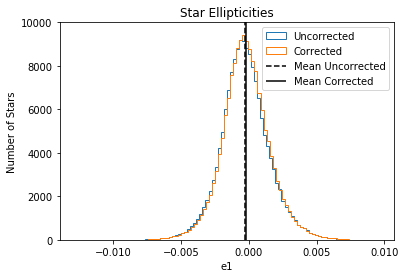

In [139]:
plt.hist(e1,histtype='step',bins=100,label='Uncorrected')
plt.hist(e1_corrected,histtype='step',bins=100,label='Corrected')
print('mean e1 uncorrected:', np.mean(e1))
print('mean e2 corrected:', np.mean(e1_corrected))
plt.vlines(np.mean(e1),ymin=0,ymax=10000,label='Mean Uncorrected',linestyles='dashed')
plt.vlines(np.mean(e1_corrected),ymin=0,ymax=10000,label='Mean Corrected')
plt.ylim(0,10000)
plt.ylabel('Number of Stars')
plt.xlabel('e1')
plt.title('Star Ellipticities')
plt.legend(loc='best')

mean e2 uncorrected: 1.5180755191782412e-05
mean e2 corrected: 1.5099644801955362e-05


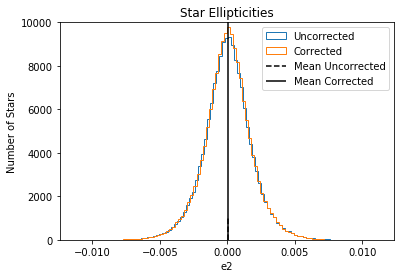

In [141]:
plt.hist(e2,histtype='step',bins=100,label='Uncorrected')
plt.hist(e2_corrected,histtype='step',bins=100,label='Corrected')
print('mean e2 uncorrected:', np.mean(e2))
print('mean e2 corrected:', np.mean(e2_corrected))
plt.vlines(np.mean(e2),ymin=0,ymax=1000,label='Mean Uncorrected',linestyles='dashed')
plt.vlines(np.mean(e2_corrected),ymin=0,ymax=10000,label='Mean Corrected')
plt.ylim(0,10000)
plt.ylabel('Number of Stars')
plt.xlabel('e2')
plt.title('Star Ellipticities')
plt.legend(loc='best')

mean e1_psf uncorrected: -0.0003025459974685459
mean e1_psf corrected: -0.0002314039777592669


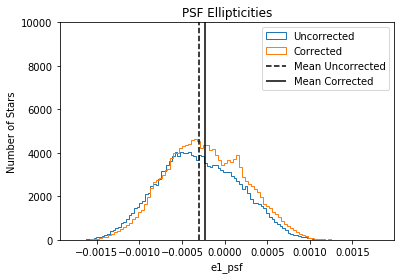

In [142]:
plt.hist(e1_psf,histtype='step',bins=100,label='Uncorrected')
plt.hist(e1_psf_corrected,histtype='step',bins=100,label='Corrected')
print('mean e1_psf uncorrected:', np.mean(e1_psf))
print('mean e1_psf corrected:', np.mean(e1_psf_corrected))
plt.vlines(np.mean(e1_psf),ymin=0,ymax=10000,label='Mean Uncorrected',linestyles='dashed')
plt.vlines(np.mean(e1_psf_corrected),ymin=0,ymax=10000,label='Mean Corrected')
plt.ylim(0,10000)
plt.ylabel('Number of Stars')
plt.xlabel('e1_psf')
plt.title('PSF Ellipticities')
plt.legend(loc='best')

mean e2_psf uncorrected: 1.52820156340793e-05
mean e2_psf corrected: 1.5187625729316444e-05


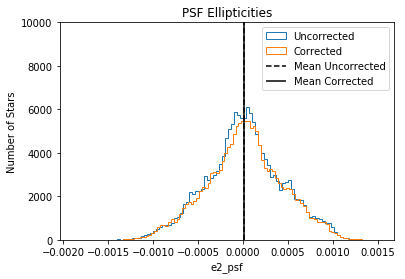

In [143]:
plt.hist(e2_psf,histtype='step',bins=100,label='Uncorrected')
plt.hist(e2_psf_corrected,histtype='step',bins=100,label='Corrected')
print('mean e2_psf uncorrected:', np.mean(e2_psf))
print('mean e2_psf corrected:', np.mean(e2_psf_corrected))
plt.vlines(np.mean(e2_psf),ymin=0,ymax=10000,label='Mean Uncorrected',linestyles='dashed')
plt.vlines(np.mean(e2_psf_corrected),ymin=0,ymax=10000,label='Mean Corrected')
plt.ylim(0,10000)
plt.ylabel('Number of Stars')
plt.xlabel('e2_psf')
plt.title('PSF Ellipticities')
plt.legend(loc='best')

Text(0.5, 1.0, 'Star Magnitudes')

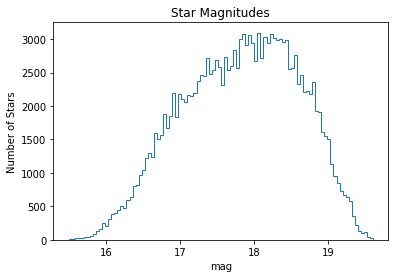

In [189]:
plt.hist(df_uncorrected['mag'],histtype='step',bins=100)
plt.ylabel('Number of Stars')
plt.xlabel('mag')
plt.title('Star Magnitudes')

mean e1 uncorrected: -0.00029602757502576054
mean e1 corrected: -0.00022437001814668166


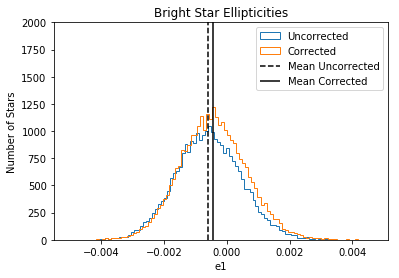

In [147]:
mag_cut = df_uncorrected['mag']<17
mag_cut_corrected = df_corrected['mag']<17
plt.hist(e1[mag_cut],histtype='step',bins=100,label='Uncorrected')
plt.hist(e1_corrected[mag_cut_corrected],histtype='step',bins=100,label='Corrected')
print('mean e1 uncorrected:', np.mean(e1))
print('mean e1 corrected:', np.mean(e1_corrected))
plt.vlines(np.mean(e1[mag_cut]),ymin=0,ymax=10000,label='Mean Uncorrected',linestyles='dashed')
plt.vlines(np.mean(e1_corrected[mag_cut_corrected]),ymin=0,ymax=10000,label='Mean Corrected')
plt.ylim(0,2000)
plt.ylabel('Number of Stars')
plt.xlabel('e1')
plt.title('Bright Star Ellipticities')
plt.legend(loc='best')

mean e2 uncorrected: 1.5180755191782412e-05
mean e2 corrected: 1.5099644801955362e-05


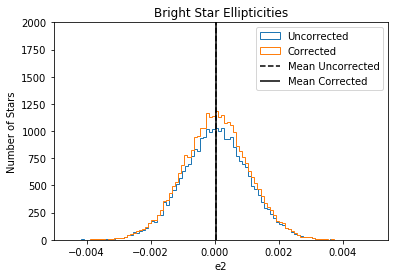

In [148]:
mag_cut = df_uncorrected['mag']<17
mag_cut_corrected = df_corrected['mag']<17
plt.hist(e2[mag_cut],histtype='step',bins=100,label='Uncorrected')
plt.hist(e2_corrected[mag_cut_corrected],histtype='step',bins=100,label='Corrected')
print('mean e2 uncorrected:', np.mean(e2))
print('mean e2 corrected:', np.mean(e2_corrected))
plt.vlines(np.mean(e2[mag_cut]),ymin=0,ymax=10099,label='Mean Uncorrected',linestyles='dashed')
plt.vlines(np.mean(e2_corrected[mag_cut_corrected]),ymin=0,ymax=10000,label='Mean Corrected')
plt.ylim(0,2000)
plt.ylabel('Number of Stars')
plt.xlabel('e2')
plt.title('Bright Star Ellipticities')
plt.legend(loc='best')

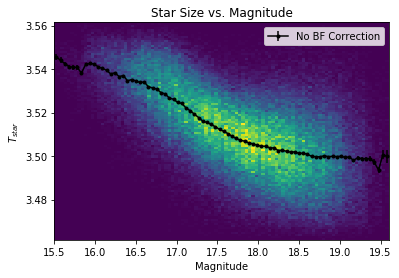

In [167]:
plt.hist2d(mag,T_star,bins=100)
plt.xlabel('Magnitude')
plt.title('Star Size vs. Magnitude')
plt.ylabel('Size T=Ixx+Iyy')

binned_value, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='.',color='black',label='No BF Correction')
plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
#plt.vlines(x=18.5,ymin=-0.08,ymax=0.1,label='DES SV Cut')
plt.legend(loc='best')

plt.show()

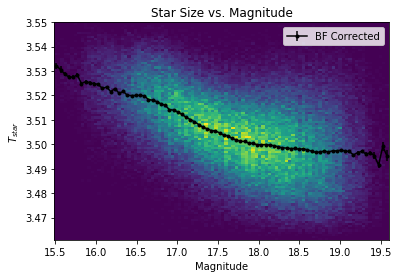

In [165]:
plt.hist2d(mag_corrected,T_star_corrected,bins=100)
plt.xlabel('Magnitude')
plt.title('Star Size vs. Magnitude')
plt.ylabel('Size T=Ixx+Iyy')

binned_value, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='.',color='black',label='BF Corrected')
plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
plt.legend(loc='best')

plt.show()

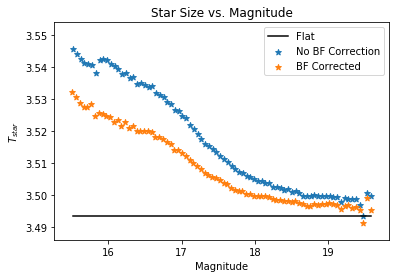

In [166]:
binned_value, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])

plt.plot(binned_mag_centers,min(binned_value)*np.ones(len(binned_mag_centers)),color='black',label='Flat')
chi2 = scipy.stats.chisquare(binned_value, f_exp=min(binned_value)*np.ones(len(binned_mag_centers)))

plt.scatter(binned_mag_centers,binned_value,marker='*',label=r'No BF Correction')
plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
plt.legend(loc='best')

binned_value, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])

chi2 = scipy.stats.chisquare(binned_value, f_exp=min(binned_value)*np.ones(len(binned_mag_centers)))


plt.scatter(binned_mag_centers,binned_value,marker='*',label='BF Corrected')

plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
plt.title('Star Size vs. Magnitude')
plt.legend(loc='best')

plt.show()



### Metric 1: Chi2 Compared to Flat

In [152]:
import scipy

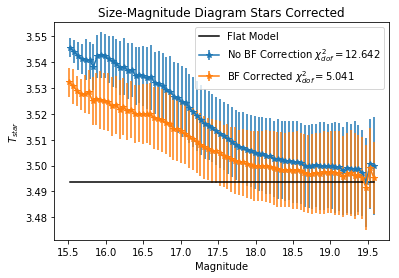

In [173]:
# Quantify how bad the turnup is, chi^2 away from flat (model assumption star size does not change
# with magnitude)

# No non-linearity, so as long as below full well this is what we would expect 

binned_value, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])


# compute the mean and the chi^2/dof
minmag = min(binned_value) #take the expected magnitude to be the minimum 
z = (binned_value - minmag) / binned_error
chi2 = np.sum(z ** 2)
N = len(binned_value)
chi2dof = chi2 / (N - 1)

plt.plot(binned_mag_centers,min(binned_value)*np.ones(len(binned_mag_centers)),color='black',label='Flat Model')

plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error,marker='*',label=r'No BF Correction $\chi^2_{dof} = $' + str(round(chi2dof,3)))
plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')

plt.legend(loc='best')

binned_value, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])

# compute the mean and the chi^2/dof
minmag = min(binned_value) #take the expected magnitude to be the minimum 
z = (binned_value - minmag) / binned_error
chi2 = np.sum(z ** 2)
N = len(binned_value)
chi2dof = chi2 / (N - 1)


plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error,marker='*',label=r'BF Corrected $\chi^2_{dof} = $' + str(round(chi2dof,3)))

plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
plt.title('Star Size vs. Magnitude')
plt.legend(loc='best')

plt.show()


### Metric 2: Fit Parameters

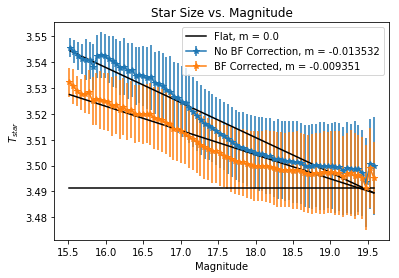

In [185]:
# Quantify how bad the turnup is, look at slope of upturn 

binned_value, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
z = np.polyfit(binned_mag_centers, binned_value, 1)
p = np.poly1d(z)
plt.plot(binned_mag_centers,p(binned_mag_centers),color='black')
 
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error,marker='*',label='No BF Correction, m = ' +str(round(z[0],6)))
plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
plt.legend(loc='best')

binned_value, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
z,zcov = np.polyfit(binned_mag_centers, binned_value, 1,cov=True)
p = np.poly1d(z)
plt.plot(binned_mag_centers,p(binned_mag_centers),color='black')
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error,marker='*',label='BF Corrected, m = ' +str(round(z[0],6)))
plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
plt.title('Star Size vs. Magnitude')

z,zcov = np.polyfit(binned_mag_centers, min(binned_value)*np.ones(len(binned_mag_centers)), 1,cov=True)
p = np.poly1d(z)
plt.plot(binned_mag_centers,min(binned_value)*np.ones(len(binned_mag_centers)),color='black',label='Flat, m = '+str(round(z[0],6)))
plt.legend(loc='best')
plt.show()

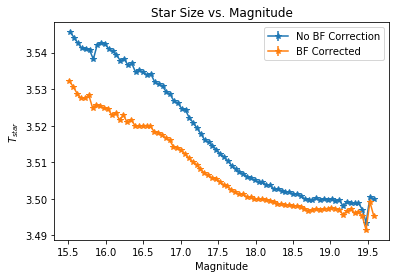

In [186]:
binned_value, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, T_star, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])

plt.errorbar(binned_mag_centers,binned_value,yerr=0,marker='*',label='No BF Correction')
plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
plt.legend(loc='best')

binned_value, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='mean', bins=80, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='std', bins=80, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag_corrected, T_star_corrected, statistic='count', bins=80, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=0,marker='*',label='BF Corrected')
plt.ylabel('$T_{star}$')
plt.xlabel('Magnitude')
plt.title('Star Size vs. Magnitude')
plt.legend(loc='best')

plt.show()

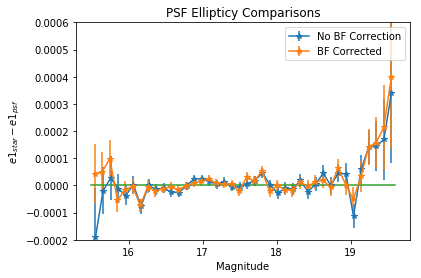

In [187]:
binned_value, binned_mag, binnumber = binned_statistic(mag, e1-e1_psf, statistic='mean', bins=40, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, e1-e1_psf, statistic='std', bins=40, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, e1-e1_psf, statistic='count', bins=40, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='*',label='No BF Correction')
plt.ylabel('$e1$')
plt.xlabel('Magnitude')
plt.legend(loc='best')

binned_value, binned_mag, binnumber = binned_statistic(mag_corrected, e1_corrected-e1_psf_corrected, statistic='mean', bins=40, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag_corrected, e1_corrected-e1_psf_corrected, statistic='std', bins=40, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag_corrected, e1_corrected-e1_psf_corrected, statistic='count', bins=40, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='*',label='BF Corrected')
plt.ylabel('$e1_{star}-e1_{psf}$')
plt.xlabel('Magnitude')
plt.title('PSF Ellipticy Comparisons')
plt.legend(loc='best')
plt.ylim(-2e-4,6e-4)
plt.plot(binned_mag,0*np.ones(len(binned_mag)))
plt.show()

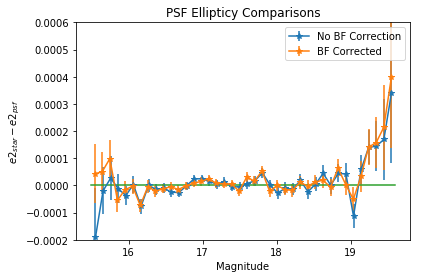

In [188]:
binned_value, binned_mag, binnumber = binned_statistic(mag, e1-e1_psf, statistic='mean', bins=40, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag, e1-e1_psf, statistic='std', bins=40, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag, e1-e1_psf, statistic='count', bins=40, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='*',label='No BF Correction')
plt.xlabel('Magnitude')
plt.legend(loc='best')

binned_value, binned_mag, binnumber = binned_statistic(mag_corrected, e1_corrected-e1_psf_corrected, statistic='mean', bins=40, range=None)
binned_error, binned_mag, binnumber = binned_statistic(mag_corrected, e1_corrected-e1_psf_corrected, statistic='std', bins=40, range=None)
binned_count, binned_mag, binnumber = binned_statistic(mag_corrected, e1_corrected-e1_psf_corrected, statistic='count', bins=40, range=None)
binned_mag_centers = 0.5*(binned_mag[1:]+binned_mag[:-1])
plt.errorbar(binned_mag_centers,binned_value,yerr=binned_error/np.sqrt(binned_count),marker='*',label='BF Corrected')
plt.ylabel('$e2_{star}-e2_{psf}$')
plt.xlabel('Magnitude')
plt.title('PSF Ellipticy Comparisons')
plt.legend(loc='best')
plt.ylim(-2e-4,6e-4)
plt.plot(binned_mag,0*np.ones(len(binned_mag)))
plt.show()